# WeRateDogs Twitter Archive Data Wrangling

The purpose of this project is to assess and clean dirty data from the WeRateDogs Twitter archive.

## Table of Contents
- [Part I - Gathering Data](#gathering_data)
- [Part II - Assess Data](#assessment)
- [Part III - Cleaning Data](#cleaning)

<a id='gathering_data'></a>
## Step 1: Gathering Data

### 1a. Get WeRateDogs twitter archive from csv file

In [1]:
import pandas as pd
import json
import numpy as np

archive_df = pd.read_csv('twitter-archive-enhanced.csv')

### 1b. Get image predictions from Udacity servers

```python
import requests

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
```

In [2]:
predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

### 1c. Query the Twitter API

#### Access Twitter API

```python
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge tweepy
import tweepy

consumer_key = 'key'
consumer_secret = 'secret'
access_token = 'token'
access_secret = 'secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
```

#### Query Twitter API to get JSON data for each tweet ID
```python
import json

file_name = 'tweet_json.txt'
error_ids = []

with open(file_name, mode='w') as file:
    for tweet_id in archive_df['tweet_id']:
        try:
            file.write(json.dumps(api.get_status(tweet_id, tweet_mode='extended')._json) + '\n')
        except Exception as e:
            error_ids.append(tweet_id)
```

#### Save error IDs (just in case)
```python
with open("error_ids.txt", mode='w') as file:
    for id in error_ids:
        file.write(str(id) + '\n')
```

#### Create a dataframe from json data

In [3]:
api_data = []

with open("tweet_json.txt") as file:
    json_line = file.readline()
    while len(json_line) > 0:
        json_line = json.loads(json_line)
        api_data.append({
            'tweet_id': json_line.get('id'),
            'retweet_count': json_line.get('retweet_count'),
            'favorite_count': json_line.get('favorite_count')

        })
        json_line = file.readline()

In [4]:
api_data_df = pd.DataFrame(api_data, columns=['tweet_id', 'retweet_count', 'favorite_count'])

<a id='assessment'></a>
## Step 2: Assessment

In [5]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
archive_df['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [8]:
# some tweets have 2 dog categories
archive_df.query('doggo == "doggo" and puppo == "puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo


In [9]:
archive_df[archive_df['text'].str.contains('RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [10]:
sum(archive_df.duplicated())

0

In [11]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
archive_df['doggo'].value_counts(), archive_df['floofer'].value_counts(), archive_df['pupper'].value_counts(), archive_df['puppo'].value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64,
 None       2346
 floofer      10
 Name: floofer, dtype: int64,
 None      2099
 pupper     257
 Name: pupper, dtype: int64,
 None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [13]:
predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
predictions_df.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
African_grey            1
limousine               1
jersey                  1
dhole                   1
mailbox                 1
Name: p1, Length: 378, dtype: int64

In [15]:
predictions_df.tweet_id.value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
816829038950027264    1
847971574464610304    1
713175907180089344    1
670338931251150849    1
700151421916807169    1
Name: tweet_id, Length: 2075, dtype: int64

In [16]:
predictions_df[predictions_df['tweet_id'] == 666020888022790149]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [17]:
api_data_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7729,36312
1,892177421306343426,5721,31310
2,891815181378084864,3786,23582
3,891689557279858688,7890,39624
4,891327558926688256,8509,37826
...,...,...,...
1633,676101918813499392,1144,2777
1634,676098748976615425,1397,2955
1635,676089483918516224,427,1286
1636,675898130735476737,561,1583


In [18]:
api_data_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7729,36312
1,892177421306343426,5721,31310
2,891815181378084864,3786,23582
3,891689557279858688,7890,39624
4,891327558926688256,8509,37826
...,...,...,...
1633,676101918813499392,1144,2777
1634,676098748976615425,1397,2955
1635,676089483918516224,427,1286
1636,675898130735476737,561,1583


In [19]:
api_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1638 non-null   int64
 1   retweet_count   1638 non-null   int64
 2   favorite_count  1638 non-null   int64
dtypes: int64(3)
memory usage: 38.5 KB


In [20]:
# values in name column that aren't names
archive_df[archive_df.name.str.islower().fillna(False)].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
actually         2
mad              2
getting          2
not              2
officially       1
incredibly       1
old              1
space            1
by               1
life             1
such             1
all              1
my               1
this             1
his              1
infuriating      1
light            1
unacceptable     1
Name: name, dtype: int64

#### Quality issues
##### `archive_df` table
1. 181 unwanted tweets (retweets)
2. unwanted columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
3. erroneous datatypes
    - tweet_id is an int not a string 
    - following ids are floats not a string
        - in_reply_to_status_id
        - in_reply_to_user_id
        - retweeted_status_id
        - retweeted_status_user_id
    - timestamp is object not a datetime 
4. "None" values in name, doggo, floofer, pupper, puppo columns instead of null
5. non-names in the name column ("such", "quite", etc)

##### `predictions_df` table
6. inconsistent capitalization in prediction columns (p1, p2, p3) 
7. erroneous datatypes
    - True/False values are not bool datatypes 
    - tweet_id is an int not a string
8. ambiguous column names (p1, p1_conf, p1_dog, etc) 
9. retweet tweet_ids are included here

##### `api_data_df` table
10. tweet_id is an int not a string

#### Tidiness issues
1. 1 or 2 variables in 4 columns in archive table (doggo, floofer, pupper, puppo)
    - some rows have multiple dog_states
2. all tables could be joined
    - inner merge would take care of archive_df rows with no images
3. would be useful to have overall rating instead of rating_denominator and rating_numerator for analysis later

<a id='cleaning'></a>
## Step 3: Clean

In [21]:
archive_clean = archive_df.copy()
predictions_clean = predictions_df.copy()
api_data_clean = api_data_df.copy()

### Quality

#### 1. `archive_df` table: retweets

##### Define
- Delete rows with text columns that start with "RT @"

##### Code

In [22]:
archive_clean = archive_clean[~archive_clean['text'].str.contains('RT @')]

##### Test

In [23]:
# retweet_status_* columns are now completely null
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### 2. `archive_df` table: unwanted columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

##### Define
- Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

##### Code

In [24]:
archive_clean = archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### Test

In [25]:
# no more unwanted columns
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

#### 3. `archive_df` table: erroneous datatypes

##### Define
- Convert tweet_id to int
- Drop in_reply_to_status_id because there are a lot of nulls and not really useful
- Drop in_reply_to_user_id because there are a lot of nulls and not really useful
- Convert timestamp to datetime
- retweeted_status_id and retweeted_user_id no longer need to be addressed

##### Code

In [26]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

##### Test

In [27]:
# check for correct datatypes and deleted columns
archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

#### 4. `archive_df` table: "None" values in name, doggo, floofer, pupper, puppo columns instead of null

##### Define
- Use .replace() to replace "None" values with np.nan

##### Code

In [28]:
archive_clean.replace("None", np.NaN, inplace=True)

##### Test

In [29]:
# check the "none" strings gone
print(archive_clean.doggo.value_counts())
print(archive_clean.floofer.value_counts())
print(archive_clean.pupper.value_counts())
print(archive_clean.puppo.value_counts())
archive_clean.name.value_counts()

doggo    87
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    234
Name: pupper, dtype: int64
puppo    25
Name: puppo, dtype: int64


a          55
Charlie    11
Lucy       11
Oliver     10
Cooper     10
           ..
Pipsy       1
Donny       1
Ralf        1
Bert        1
Brandy      1
Name: name, Length: 955, dtype: int64

#### 5. `archive_df` table: non-names in the name column ("such", "quite", etc)

##### Define
- non-names seem to be lowercase, so get a list of lowercase values in name column
- replace all those values with np.nan

##### Code

In [30]:
non_names = list(archive_df[archive_df.name.str.islower().fillna(False)].name)
archive_clean.name.replace(non_names, np.NaN, inplace=True)

##### Test

In [31]:
# verify no more lowercase names
archive_clean[archive_clean.name.str.islower().fillna(False)].name.value_counts()

Series([], Name: name, dtype: int64)

#### 6. `predictions_df` table: inconsistent capitalization in prediction columns (p1, p2, p3)

##### Define
- change all values to lowercase with .str.lower()

##### Code

In [32]:
predictions_clean.p1 = predictions_clean.p1.str.lower()
predictions_clean.p2 = predictions_clean.p2.str.lower()
predictions_clean.p3 = predictions_clean.p3.str.lower()

##### Test

In [33]:
# check that all rows are lowercase
sum(predictions_clean.p1.str.islower()) == predictions_clean.shape[0]

True

#### 7. `predictions_df` table: erroneous datatypes

##### Define
- Convert p1_dog, p2_dog, p3_dog to bool
- Convert tweet_id to string

#### Code

In [34]:
predictions_clean.p1_dog = predictions_clean.p1_dog.astype(bool)
predictions_clean.p2_dog = predictions_clean.p2_dog.astype(bool)
predictions_clean.p3_dog = predictions_clean.p3_dog.astype(bool)
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

##### Test

In [35]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 8. `predictions_df` table: ambiguous column names (p1, p1_conf, p1_dog, etc)

##### Define
- Rename column names to prediction1, prediction1_confidence, prediction1_is_dog, etc

#### Code

In [36]:
predictions_clean.rename(columns={
    'p1': 'prediction1', 
    'p1_conf': 'prediction1_confidence',
    'p1_dog': 'prediction1_is_dog', 
    'p2': 'prediction2', 
    'p2_conf': 'prediction2_confidence',
    'p2_dog': 'prediction2_is_dog', 
    'p3': 'prediction3', 
    'p3_conf': 'prediction3_confidence',
    'p3_dog': 'prediction3_is_dog'
}, inplace=True)

##### Test

In [37]:
predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction1',
       'prediction1_confidence', 'prediction1_is_dog', 'prediction2',
       'prediction2_confidence', 'prediction2_is_dog', 'prediction3',
       'prediction3_confidence', 'prediction3_is_dog'],
      dtype='object')

#### 9. `predictions_df` table: retweet tweet_ids are included here

##### Define
- Delete rows where tweet_id is not in `archive_clean`

##### Code

In [38]:
retweet_ids = list(archive_df[archive_df.text.str.contains('RT @')].tweet_id.astype(str))
predictions_clean = predictions_clean[~predictions_clean.tweet_id.isin(retweet_ids)]

##### Test

In [39]:
# check that no retweets are in archive_clean
ids = []
for tweet_id in retweet_ids:
    if predictions_clean[predictions_clean.tweet_id == tweet_id].shape[0] > 0:
        ids.append(tweet_id)
        
assert len(ids) == 0

#### 10. `api_data_df` table:  tweet_id is an int not a string

##### Define
- Convert tweet_id column to a string

##### Code

In [40]:
api_data_clean.tweet_id = api_data_clean.tweet_id.astype(str)

##### Test

In [41]:
# check that tweet_id is str
assert type(api_data_clean.tweet_id[0]) == str
api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1638 non-null   object
 1   retweet_count   1638 non-null   int64 
 2   favorite_count  1638 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 38.5+ KB


### Tidiness

#### 1. `archive_df table`: 1 variable in 4 columns (doggo, floofer, pupper, puppo)

##### Define
- Change all nans to empty string so that we can concat them
- Create a new column named 'dog_state' and concatenates the 4 other columns
- Using value_counts(), check if there are values with 2+ states
- Replace those values with comma separated values
- Change empty strings back to nans
- Drop the 4 columns

##### Code

In [42]:
archive_clean.floofer.fillna("", inplace=True)
archive_clean.pupper.fillna("", inplace=True)
archive_clean.puppo.fillna("", inplace=True)
archive_clean.doggo.fillna("", inplace=True)

archive_clean['dog_state'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

In [43]:
archive_clean.dog_state.value_counts() 

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_state, dtype: int64

In [44]:
archive_clean.loc[archive_clean.dog_state == "doggofloofer", 'dog_state'] = "doggo, floofer"
archive_clean.loc[archive_clean.dog_state == "doggopupper", 'dog_state'] = "doggo, pupper"
archive_clean.loc[archive_clean.dog_state == "doggopuppo", 'dog_state'] = "doggo, puppo"

In [45]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [46]:
archive_clean.dog_state = archive_clean.dog_state.replace('', np.NaN)

##### Test

In [47]:
archive_clean.dog_state.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_state, dtype: int64

In [48]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_state'],
      dtype='object')

#### 2. `all tables`: merge

##### Define
- Do an inner merge with archive_clean and predictions_clean because we don't want tweets with no images
- Do a left merge with archive_clean and api_data_clean
- After merge, columns from api_data become floats; change them back to ints

##### Code

In [49]:
archive_clean = pd.merge(archive_clean, predictions_clean, on='tweet_id', how='inner')
archive_clean = pd.merge(archive_clean, api_data_clean, on='tweet_id', how='left')

In [50]:
# change retweet_count and favorite_count to ints
archive_clean.retweet_count = archive_clean.retweet_count.fillna(False).astype(int)
archive_clean.favorite_count = archive_clean.favorite_count.fillna(False).astype(int)

##### Test

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1994 non-null   object             
 1   timestamp               1994 non-null   datetime64[ns, UTC]
 2   source                  1994 non-null   object             
 3   text                    1994 non-null   object             
 4   expanded_urls           1994 non-null   object             
 5   rating_numerator        1994 non-null   int64              
 6   rating_denominator      1994 non-null   int64              
 7   name                    1350 non-null   object             
 8   dog_state               306 non-null    object             
 9   jpg_url                 1994 non-null   object             
 10  img_num                 1994 non-null   int64              
 11  prediction1             1994 non-null   obj

In [52]:
# making sure that only tweets with images are here
archive_clean[archive_clean.prediction1.isna()].shape[0]

0

#### 3. `archive_df`: create new column for overall rating

##### Define
- Create new column by dividing numerator and denominator column
- Drop numerator and denominator

##### Code

In [53]:
archive_clean['overall_rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

##### Test

In [54]:
archive_clean.overall_rating.value_counts()

1.200000      454
1.000000      421
1.100000      402
1.300000      261
0.900000      151
0.800000       95
0.700000       51
1.400000       35
0.500000       34
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
177.600000      1
2.600000        1
3.428571        1
0.636364        1
0.818182        1
42.000000       1
7.500000        1
2.700000        1
Name: overall_rating, dtype: int64

In [55]:
archive_clean[archive_clean.overall_rating == 0.1]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_state,jpg_url,...,prediction1_is_dog,prediction2,prediction2_confidence,prediction2_is_dog,prediction3,prediction3_confidence,prediction3_is_dog,retweet_count,favorite_count,overall_rating
1519,675153376133427200,2015-12-11 03:21:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,https://twitter.com/dog_rates/status/675153376...,1,10,NaN,NaN,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,...,False,mailbox,0.096027,False,seat_belt,0.034995,False,0,0,0.1
1735,670783437142401025,2015-11-29 01:56:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,https://twitter.com/dog_rates/status/670783437...,1,10,NaN,NaN,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,...,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False,0,0,0.1
1900,667549055577362432,2015-11-20 03:44:31+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,NaN,NaN,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,...,False,spotlight,0.007737,False,lampshade,0.001901,False,0,0,0.1
1976,666104133288665088,2015-11-16 04:02:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1,10,NaN,NaN,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,...,False,cock,0.033919,False,partridge,0.000052,False,0,0,0.1


## Step 4: Store data

In [56]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Step 5: Analyze and Visualize

### Insights

#### Insight 1: Most commonly predicted dogs by the neural network were golden retrievers and labrador retrievers

In [57]:
# get top predictions from each prediction column
archive_clean.prediction1.value_counts()[:3]

golden_retriever      139
labrador_retriever     95
pembroke               88
Name: prediction1, dtype: int64

In [58]:
archive_clean.prediction2.value_counts()[:3]

labrador_retriever    96
golden_retriever      82
cardigan              73
Name: prediction2, dtype: int64

In [59]:
archive_clean.prediction3.value_counts()[:3]

labrador_retriever    76
chihuahua             57
golden_retriever      46
Name: prediction3, dtype: int64

In [60]:
total_golden_retrievers = archive_clean.prediction1.value_counts().golden_retriever + archive_clean.prediction2.value_counts().golden_retriever + archive_clean.prediction3.value_counts().golden_retriever
total_golden_retrievers

267

In [61]:
total_labrador_retrievers = archive_clean.prediction1.value_counts().labrador_retriever + archive_clean.prediction2.value_counts().labrador_retriever + archive_clean.prediction3.value_counts().labrador_retriever
total_labrador_retrievers

267

#### Insight 2: Dog states that are both "doggo" and "puppo" are rated highest

In [62]:
# get averages for each dog_state
archive_clean.groupby('dog_state').overall_rating.mean().sort_values(ascending=False)

dog_state
doggo, puppo      1.300000
puppo             1.200000
floofer           1.200000
doggo             1.188889
doggo, floofer    1.100000
doggo, pupper     1.100000
pupper            1.071429
Name: overall_rating, dtype: float64

#### Insight 3: Most ratings are greater than 10; the 2 that earned 0 ratings were not dogs (a plagiarism attempt and picture from a window)

In [63]:
archive_clean[archive_clean['overall_rating'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_state,jpg_url,...,prediction1_is_dog,prediction2,prediction2_confidence,prediction2_is_dog,prediction3,prediction3_confidence,prediction3_is_dog,retweet_count,favorite_count,overall_rating
235,835152434251116546,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,NaN,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,...,False,american_staffordshire_terrier,0.012731,True,staffordshire_bullterrier,0.007039,True,3035,22545,0.0
756,746906459439529985,2016-06-26 03:22:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,NaN,NaN,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,...,False,fountain,0.199776,False,space_shuttle,0.064807,False,298,2906,0.0


##### Screenshots from expanded_urls above
<table><tr><td><img src="imgs/screenshot1.png"></td><td><img src="imgs/screenshot2.png"></td></tr></table>

### Visualization

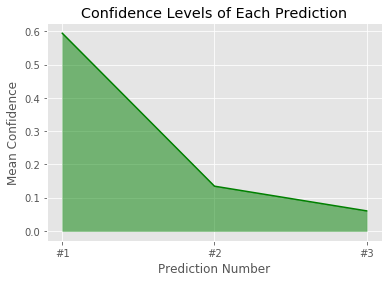

In [64]:
# average confidence levels of predictions
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

means = [archive_clean.prediction1_confidence.mean(), archive_clean.prediction2_confidence.mean(), archive_clean.prediction3_confidence.mean()]
x_labels = ["#1", "#2", "#3"]

plt.plot(x_labels, means, color="green")
plt.fill_between(x_labels, means, color='green', alpha=.5)
plt.xlabel("Prediction Number")
plt.ylabel("Mean Confidence")
plt.title("Confidence Levels of Each Prediction")
plt.xticks([0, 1, 2], x_labels)
plt.show()


From the dataset, I understood that each succeeding prediction was lower in confidence, but I wanted to visualize how big the difference in confidence was. In this line chart, we can see that after the first prediction, the confidence level had a *huge* drop (from .6 to about .13!)